<a href="https://colab.research.google.com/github/ahoucbvtw/Minst-Pratice/blob/main/Minst_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 此題可以先將圖片讀近來，一般來說不能先讀，因為這樣會把RAM弄爆
from tensorflow.keras.datasets.fashion_mnist import load_data
# load_data()→((訓練圖片,訓練答案), (驗證圖片, 驗證答案))
(traindata, trainanswer), (testdata, testanswer) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(traindata.shape)
print(trainanswer.shape)
print(testdata.shape)
print(testanswer.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


7


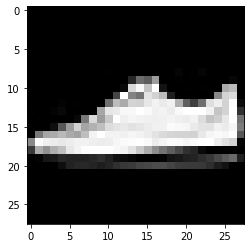

In [ ]:
# 查看設定的顏色↓
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 59999)
print(trainanswer[idx])
# 更改顏色 cmap="gray"
plt.imshow(traindata[idx], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(traindata[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,0,1,5,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,39,107,92,157,0,0,1,0,1,0,0,0,0,7,0


In [ ]:
# 建立深度神經網路模型
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
layers = [
        #   784 * 128(連線各數) + 128(bias) parameter需要調整參數
          Dense(128, activation = "relu", input_dim = 784),#第一層,input_dim輸入預設的圖片size(28*28),128為自己設定的第2層神經集合
        #   128 * 10(最後答案10個選項) + 10(bias) parameter需要調整參數
          Dense(10, activation = "softmax")#最後一層,10為自己設定最後的神經集合
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 交插商Cross Entropy(機率用這個)
# p = 預測
# p1 * log(1/q1) + p2 * log(1/q2)....
# 多個神經元:Categorcial CrossEntropy
# 一個神經元:Binary CrossEntropy 
# SparseCategoricalCrossentropy 可以節省Ram直接交給tensorflow處理,因為可以不必自己處理OneHotEncoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss = SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics = ["accuracy"])

In [ ]:
# 資料處理OneHotEncoding: 答案的部分trainanswer testanswer 
# from tensorflow.keras.utils import to_categorical
# trainanswer_cat = to_categorical(trainanswer, num_classes = 10)
# testanswer_cat = to_categorical(testanswer, num_classes = 10)
# print(trainanswer[0])
# print(trainanswer_cat[0])

In [ ]:
# 資料處理Normalize: 輸入的部分traindata testdata
# 使用tensorflow函式一定要Normalize => 0~1 or -1~1
# reshape: -1(numpy會幫忙計算-1值會是多少，但最多只能一個)
traindata_norm = traindata.reshape(-1, 784) / 255
testdata_norm = testdata.reshape(-1, 784) / 255
print(traindata_norm.shape)
print(testdata_norm.shape)

(60000, 784)
(10000, 784)


In [ ]:
# validation_split 分割訓練資料和答案
# batch_size 看多少筆後再調整一次(20~200)
# epochs 整份訓練資料需要看幾次(10~60000*10)
# verbose 0(quite) 1(default) 2(one line per epoch)
# fit完看val_loss的值，若其中有個值很小且後面5個都大於它，則最小值就是最後答案
# val_accuracy 為準確率
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x = traindata_norm, y = trainanswer,
        validation_split = 0.1,
        batch_size = 200, epochs = 100, verbose = 2, callbacks = callbacks)

Epoch 1/100
270/270 - 2s - loss: 0.6054 - accuracy: 0.7941 - val_loss: 0.4695 - val_accuracy: 0.8267
Epoch 2/100
270/270 - 1s - loss: 0.4247 - accuracy: 0.8548 - val_loss: 0.4176 - val_accuracy: 0.8532
Epoch 3/100
270/270 - 1s - loss: 0.3852 - accuracy: 0.8657 - val_loss: 0.3771 - val_accuracy: 0.8638
Epoch 4/100
270/270 - 1s - loss: 0.3581 - accuracy: 0.8736 - val_loss: 0.3696 - val_accuracy: 0.8712
Epoch 5/100
270/270 - 1s - loss: 0.3386 - accuracy: 0.8791 - val_loss: 0.3722 - val_accuracy: 0.8678
Epoch 6/100
270/270 - 1s - loss: 0.3204 - accuracy: 0.8859 - val_loss: 0.3466 - val_accuracy: 0.8753
Epoch 7/100
270/270 - 1s - loss: 0.3071 - accuracy: 0.8896 - val_loss: 0.3381 - val_accuracy: 0.8777
Epoch 8/100
270/270 - 1s - loss: 0.2951 - accuracy: 0.8940 - val_loss: 0.3332 - val_accuracy: 0.8808
Epoch 9/100
270/270 - 1s - loss: 0.2846 - accuracy: 0.8967 - val_loss: 0.3423 - val_accuracy: 0.8780
Epoch 10/100
270/270 - 1s - loss: 0.2760 - accuracy: 0.9002 - val_loss: 0.3402 - val_accura

In [ ]:
model.evaluate(x = testdata_norm, y = testanswer)

313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8837


[0.3279150426387787, 0.8837000131607056]

In [ ]:
from sklearn.metrics import  confusion_matrix
pre = model.predict_classes(testdata_norm)
mat = confusion_matrix(testanswer, pre)
pd.DataFrame(mat, columns=["{}(預測)".format(i) for i in range(10)],
       index=["{}(真正)".format(i) for i in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真正),834,1,20,30,5,2,102,0,6,0
1(真正),2,972,1,20,3,0,2,0,0,0
2(真正),14,0,793,10,117,0,65,0,1,0
3(真正),18,11,20,898,29,0,20,0,4,0
4(真正),0,1,83,32,821,0,62,0,1,0
5(真正),0,0,0,1,0,957,0,24,2,16
6(真正),119,1,85,33,75,0,681,0,6,0
7(真正),0,0,0,0,0,16,0,955,0,29
8(真正),6,0,5,3,5,2,6,6,967,0
9(真正),0,0,0,0,0,7,1,33,0,959


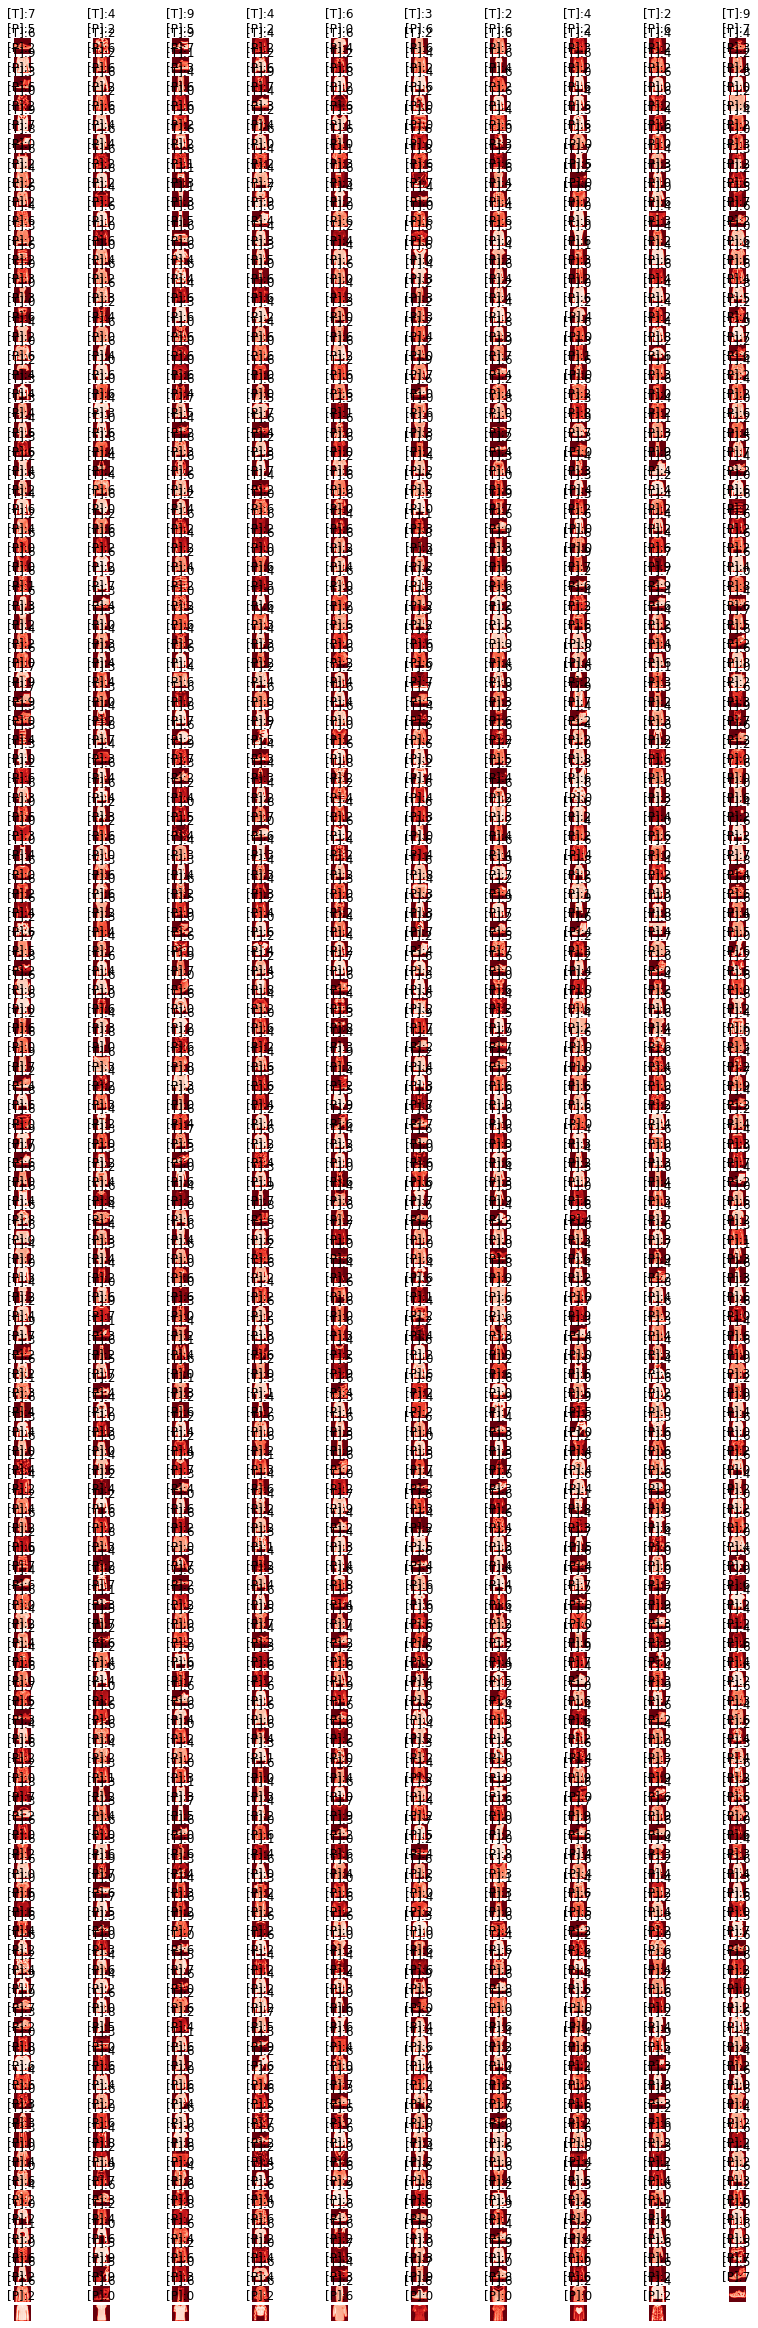

In [ ]:
# 找出所有預測錯誤的index
# MLP缺點 利用像素的缺or補上去判斷特徵
import numpy as np
idx = np.nonzero(pre != testanswer)[0]
# idx = 
img, label, p = testdata[idx], testanswer[idx], pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(label[i], p[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i], cmap="Reds_r")